In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data  as pdr

In [4]:
ark_holdings = pd.read_csv('ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv')
ark_holdings.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv'

In [12]:
start, end = "2015-01-01", "2024-12-31"
df_arkk = yf.download("ARKK", start=start, end=end)

hedging_etf = yf.download(['TLT', 'IEF', '^TNX'], start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  3 of 3 completed


In [13]:
print(hedging_etf.head())

Price           Close                          High                     \
Ticker            IEF         TLT   ^TNX        IEF         TLT   ^TNX   
Date                                                                     
2015-01-02  86.090492   97.605240  2.123  86.195554   97.865892  2.213   
2015-01-05  86.615860   99.138489  2.039  86.672429   99.376137  2.109   
2015-01-06  87.197708  100.924706  1.963  87.658345  101.568670  1.997   
2015-01-07  87.181503  100.725365  1.954  87.286565  101.170002  2.008   
2015-01-08  86.825966   99.391457  2.016  86.931021   99.943419  2.030   

Price             Low                         Open                     \
Ticker            IEF        TLT   ^TNX        IEF         TLT   ^TNX   
Date                                                                    
2015-01-02  85.710668  96.708303  2.102  85.734911   96.815629  2.197   
2015-01-05  86.195633  98.095888  2.037  86.236036   98.134215  2.102   
2015-01-06  86.898696  99.805456  1.889  8

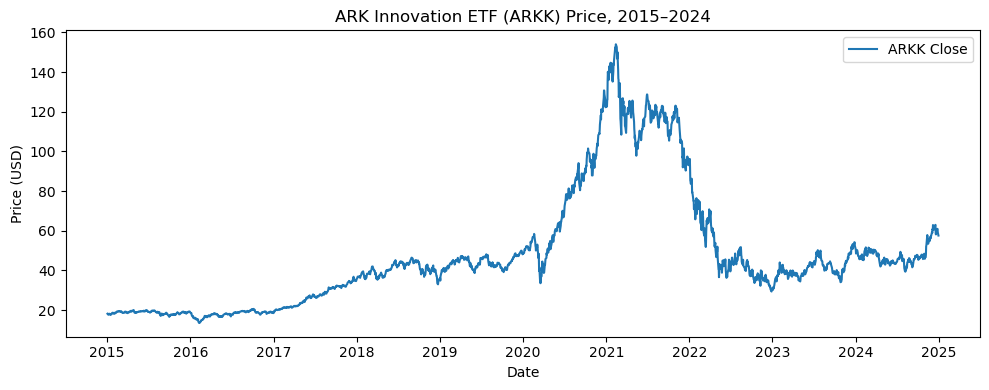

In [6]:
plt.figure(figsize=(10,4))
plt.plot(df_arkk.index, df_arkk["Close"], label="ARKK Close")
plt.title("ARK Innovation ETF (ARKK) Price, 2015–2024")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()



MultiIndex([( 'Close', 'ARKK'),
            (  'High', 'ARKK'),
            (   'Low', 'ARKK'),
            (  'Open', 'ARKK'),
            ('Volume', 'ARKK')],
           names=['Price', 'Ticker'])


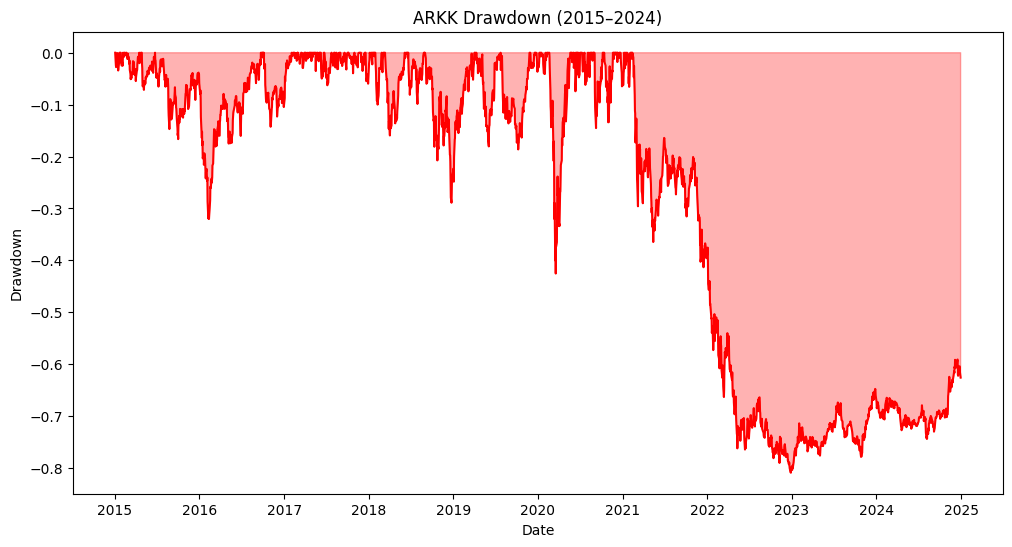

        Date Drawdown
0 2022-12-28  -80.91%
1 2022-12-27  -80.82%
2 2023-01-03  -80.39%
3 2022-12-23  -80.06%
4 2023-01-05  -80.03%


In [6]:
# 1) If you’ve ever downloaded multiple tickers at once, check your columns:
print(df_arkk.columns)

# 2) Pull out the ARKK Close price as a Series:
close = df_arkk['Close']
if isinstance(close, pd.DataFrame):
    # if it’s a one-column DataFrame, squeeze it
    close = close.squeeze()
close.name = 'Close'

# 3) Build a new df with just that Series (or overwrite your df_arkk)
df = close.to_frame()

# 4) Compute rolling max and drawdown
df['RollingMax'] = df['Close'].cummax()
df['Drawdown']  = df['Close'] / df['RollingMax'] - 1

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Drawdown'], color='red')
plt.fill_between(df.index, df['Drawdown'], 0,
                 where=df['Drawdown']<0, color='red', alpha=0.3)
plt.title('ARKK Drawdown (2015–2024)')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.show()

# 6) Five worst troughs
worst5 = df['Drawdown'].nsmallest(5).reset_index()
worst5.columns = ['Date','Drawdown']
worst5['Drawdown'] = worst5['Drawdown'].map(lambda x: f"{x:.2%}")
print(worst5)


In [7]:
tickers = ['SPY', 'GD=F', 'HYG', 'GOLD', 'EURUSD=X', 'JPY=X']

start_date = '2014-10-31'
end_date = '2025-05-16'

dfs_full = {}

for ticker in tickers: 
    prices = yf.Ticker(ticker).history(start=start_date, end=end_date, auto_adjust=True)['Close']
    rets = prices.pct_change()
    dfs_full[ticker] = pd.DataFrame(index = rets.index, data ={'Return': rets}).dropna()


tsy_series = pdr.FredReader('DGS10', start = start_date, end = end_date).read()/100
D, C = 8,80
delta_y = tsy_series.diff()
tsy_price_ret = -D * delta_y + 0.5 * C * delta_y ** 2
tsy_carry_ret = tsy_series/252
tsy_ret = (tsy_carry_ret + tsy_price_ret).dropna()

dfs_full['TSY']=pd.DataFrame(index = tsy_series.index, data ={'Return':  tsy_ret['DGS10']})

for ticker in dfs_full:
    dfs_full[ticker].index = dfs_full[ticker].index.tz_localize(None)

 

AttributeError: module 'pandas_datareader' has no attribute 'FredReader'